In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude adn longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import from Citipy dependency.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities. 
cities = []

# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

610

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call. 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Import the requests Library. 
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Create an empty list to hold the weather data. 
city_data = []

#Print the beginning of the logging. 
print ('Beginning Data Retrieval     ')
print ('-----------------------------')

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep (60)
        
    #Create Endpoint url with each city. 
    city_url = url + '&q=' + city.replace (' ', '+')
    
    # Log the URL, record, and set numbers and the city. 
    print (f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count. 
    record_count += 1
    
    # Run an API request for each of the cities. 
    try: 
    
        # Parse the JSON and retrieve the data. 
        city_weather = requests.get (city_url).json()

        # Parse out the needed data. 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        # Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list. 
        city_data.append({'City' : city.title(),
                          'Lat' : city_lat,
                          'Lng' : city_lng,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date': city_date})
        
# If an error is experienced, skip the city. 
    except:
        print ('City not found. Skipping...')
        pass

# Indicate the data loading is complete.
print ('-----------------------------')
print ('Data Retrieval Complete      ')
print ('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | zhoucheng
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | santa isabel do rio negro
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hohhot
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | bintulu
Processing Record 20 of Set 1 | kelvington
Processing Record 21 of Set 1 | bulaevo
Processing Record 22 of Set 1 | ri

Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | deputatskiy
Processing Record 41 of Set 4 | neiafu
Processing Record 42 of Set 4 | erenhot
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | veshenskaya
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | ust-ilimsk
Processing Record 49 of Set 4 | konskie
Processing Record 50 of Set 4 | atar
Processing Record 1 of Set 5 | nabire
Processing Record 2 of Set 5 | awjilah
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | khromtau
Processing Record 5 of Set 5 | shache
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | ostrzeszow
Processing Record 8 of Set 5 | shubarshi
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | grand gaube
Processing Record 11 of Set 5 | los llanos de aridane
Processing Record 12 of

Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | pemberton
Processing Record 34 of Set 8 | khonuu
City not found. Skipping...
Processing Record 35 of Set 8 | williston
Processing Record 36 of Set 8 | saryg-sep
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | belaya gora
Processing Record 39 of Set 8 | livadiya
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | gravdal
Processing Record 42 of Set 8 | corinto
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | mirabad
Processing Record 45 of Set 8 | garwolin
Processing Record 46 of Set 8 | duki
Processing Record 47 of Set 8 | mwense
Processing Record 48 of Set 8 | te anau
Processing Record 49 of Set 8 | grand-santi
Processing Record 50 of Set 8 | gorbehaza
Processing Record 1 of Set 9 | rovaniemi
Processing Record 2 of Set 9 | abu samrah
Processing Record 3 of Set 9 | saint-pierre
Processing Record 4 of Set 9 | sardarshahr
Processing Record 5 of Set

Processing Record 20 of Set 12 | ukiah
Processing Record 21 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 22 of Set 12 | ruteng
Processing Record 23 of Set 12 | hammerfest
Processing Record 24 of Set 12 | poya
Processing Record 25 of Set 12 | serebryansk
Processing Record 26 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 12 | el alto
Processing Record 28 of Set 12 | artyk
City not found. Skipping...
Processing Record 29 of Set 12 | kahama
Processing Record 30 of Set 12 | malappuram
Processing Record 31 of Set 12 | ilhabela
Processing Record 32 of Set 12 | montefiascone
Processing Record 33 of Set 12 | saint-gaudens
Processing Record 34 of Set 12 | kamaishi
Processing Record 35 of Set 12 | masvingo
Processing Record 36 of Set 12 | jiddah
City not found. Skipping...
Processing Record 37 of Set 12 | strathpeffer
Processing Record 38 of Set 12 | laguna
Processing Record 39 of Set 12 | marsh harbour
Processing Record 40 of Set 12 | turi

In [11]:
# Convert the Array of dictionarie to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,19.63,79,75,5.75,CA,2022-10-08 19:40:31
1,Punta Arenas,-53.1500,-70.9167,48.31,66,75,23.02,CL,2022-10-08 19:37:45
2,Bethel,41.3712,-73.4140,59.58,54,40,10.36,US,2022-10-08 19:40:32
3,Yellowknife,62.4560,-114.3525,48.72,81,75,0.00,CA,2022-10-08 19:40:33
4,Kapaa,22.0752,-159.3190,81.48,75,20,5.75,US,2022-10-08 19:40:33
5,Mataura,-46.1927,168.8643,45.70,72,86,3.74,NZ,2022-10-08 19:40:34
6,Busselton,-33.6500,115.3333,55.58,80,44,5.57,AU,2022-10-08 19:40:34
7,Jamestown,42.0970,-79.2353,48.02,51,75,13.80,US,2022-10-08 19:40:35
8,Chokurdakh,70.6333,147.9167,21.65,91,100,19.08,RU,2022-10-08 19:40:35
9,Zhoucheng,35.9122,116.3117,55.09,34,74,15.01,CN,2022-10-08 19:40:36


In [12]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-10-08 19:40:31,70.4692,-68.5914,19.63,79,75,5.75
1,Punta Arenas,CL,2022-10-08 19:37:45,-53.1500,-70.9167,48.31,66,75,23.02
2,Bethel,US,2022-10-08 19:40:32,41.3712,-73.4140,59.58,54,40,10.36
3,Yellowknife,CA,2022-10-08 19:40:33,62.4560,-114.3525,48.72,81,75,0.00
4,Kapaa,US,2022-10-08 19:40:33,22.0752,-159.3190,81.48,75,20,5.75
5,Mataura,NZ,2022-10-08 19:40:34,-46.1927,168.8643,45.70,72,86,3.74
6,Busselton,AU,2022-10-08 19:40:34,-33.6500,115.3333,55.58,80,44,5.57
7,Jamestown,US,2022-10-08 19:40:35,42.0970,-79.2353,48.02,51,75,13.80
8,Chokurdakh,RU,2022-10-08 19:40:35,70.6333,147.9167,21.65,91,100,19.08
9,Zhoucheng,CN,2022-10-08 19:40:36,35.9122,116.3117,55.09,34,74,15.01


In [13]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

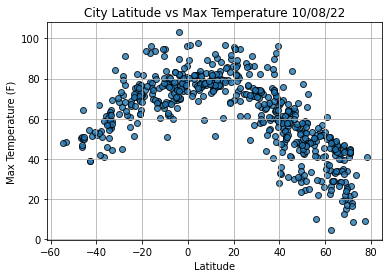

In [24]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

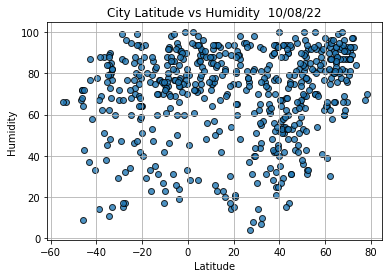

In [23]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Humidity  ' + time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

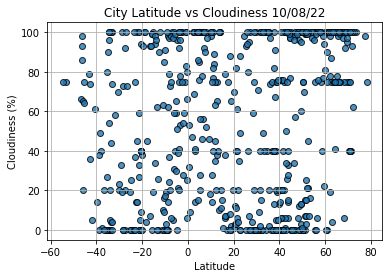

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Cloudiness ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

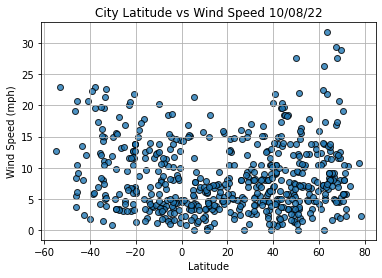

In [26]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats, 
            wind_speed,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Wind Speed ' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()